In [809]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import tensorflow as tf

In [810]:
def plotData(d, num_classes, colors):
    for i in range(num_classes):
        temp_data = d[d[:, 2] == i]
        plt.scatter(temp_data[:,0], temp_data[:,1], s = 2, color=colors[i])

    plt.show()


In [811]:
def normalize_data(data, x0_mean, x1_mean, x0_std, x1_std, include_output = False):	
    temp_data = np.zeros((data.shape))
    temp_data[:, 0] = (data[:, 0] - x0_mean) / x0_std
    temp_data[:, 1] = (data[:, 1] - x1_mean) / x1_std
    if(include_output == True):
        temp_data[:, 2] = data[:, 2]
    return(temp_data)

In [812]:

def denormalize_data(data, x0_mean, x1_mean, x0_std, x1_std):
    temp_data = np.zeros((data.shape))
    temp_data[:, 0] = (data[:, 0] * x0_std) + x0_mean
    temp_data[:, 1] = (data[:, 1] * x1_std)	+ x1_mean
    temp_data[:, 2] = data[:, 2]

    return(temp_data)

In [813]:
trainData = pickle.load(open("train_data/trainData.pickle", "rb"))
validationData = pickle.load(open("train_data/validationData.pickle", "rb"))
testData = pickle.load(open("train_data/testData.pickle", "rb"))


In [814]:
train_x0_mean = np.mean(trainData[:, 0])
train_x1_mean = np.mean(trainData[:, 1])
train_x0_std = np.std(trainData[:, 0])
train_x1_std = np.std(trainData[:, 1])


In [815]:
nTrainData = normalize_data(trainData, train_x0_mean, train_x1_mean, train_x0_std, train_x1_std, True)
nValidationData = normalize_data(validationData, train_x0_mean, train_x1_mean, train_x0_std, train_x1_std, True)
nTestData = normalize_data(testData, train_x0_mean, train_x1_mean, train_x0_std, train_x1_std, True)


In [816]:
print(trainData.shape)
print(validationData.shape)
print(testData.shape)


(2400, 3)
(1800, 3)
(1800, 3)


In [817]:
# Remap training data into binary classes
def remapData(data, positiveClass):
    tempData = np.zeros(data.shape)
    for i in range(data.shape[0]):
        tempData[i] = data[i]
        if(data[i, 2] != positiveClass):
            tempData[i, 2] = 0
        else:
            tempData[i, 2] = 1   
    return(tempData)            


In [818]:
nTrainClass0Data = remapData(nTrainData, 0)
nValidationClass0Data = remapData(nValidationData, 0)


In [819]:
nTrainClass0_x = nTrainClass0Data[:, :2]
train_output = nTrainClass0Data[:, 2]

In [820]:
x = tf.placeholder(tf.float32, [None, 2])

W1 = tf.Variable(tf.truncated_normal([2,1], stddev = 0.1))
b1 = tf.Variable(tf.constant(0.1, shape = [1]))
y1 = tf.matmul(x, W1) + b1
y1_sig = tf.sigmoid(y1)
y_ = tf.placeholder(tf.float32, [None, ])


In [821]:
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels = y_, logits = y1_sig[:,0]))

In [822]:
train_step = tf.train.AdagradOptimizer(2.0).minimize(loss)

In [823]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
loss_arr = []
for _ in range(10000):
    sess.run(train_step, feed_dict={x: nTrainClass0_x, y_: train_output})
    W1_val, b1_val, y1_sig_val, loss_val = sess.run([W1, b1, y1_sig, loss],
     feed_dict = {x: nTrainClass0_x, y_: train_output})
    loss_arr.append(loss_val)


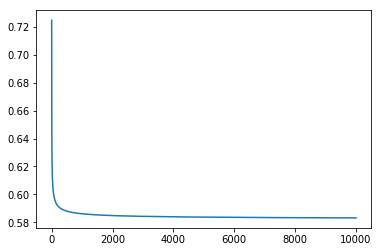

In [824]:
plt.plot(loss_arr)
plt.show()


In [825]:
y_pred = np.ndarray.flatten(y1_sig_val >=0.5)

In [826]:
y_act = train_output == 1

In [827]:
result = (~y_pred & ~y_act) | (y_pred & y_act)

In [828]:
#test validation data

In [829]:
nValidation_x = nValidationClass0Data[:, :2]

In [830]:
[validation_y1_sig] = sess.run([y1_sig], feed_dict={x: nValidation_x})

In [831]:
all_results = validation_y1_sig.copy()

In [832]:
nValidationData.shape

(1800, 3)

In [833]:
validation_output = nValidationClass0Data[:, 2]

In [834]:
y_pred = np.ndarray.flatten(validation_y1_sig >=0.5)

In [835]:
y_act = validation_output == 1

In [836]:
result = (~y_pred & ~y_act) | (y_pred & y_act)

In [837]:
print("Accuracy = %s"%(sum(result)*100/len(validation_output))) 

Accuracy = 97.0


In [838]:
all_points = np.empty([0,2])
for x_i in range(-70, 220):
	for y_i in range (-60, 200):
		all_points = np.append(all_points, [[x_i, y_i]], axis = 0)

In [839]:
n_all_points = normalize_data(all_points, train_x0_mean, train_x1_mean, train_x0_std, train_x1_std)

In [840]:
[all_y1_sig] = sess.run([y1_sig], feed_dict={x: n_all_points})

In [841]:
y_sig_class0 = all_y1_sig

In [842]:
y_pred_class0 = np.ndarray.flatten(all_y1_sig >=0.5)

In [843]:
n_result = y_pred_class0*1

In [844]:
a = n_result.reshape(75400, 1)

In [845]:
plot_points = np.append(n_all_points, a, axis=1)

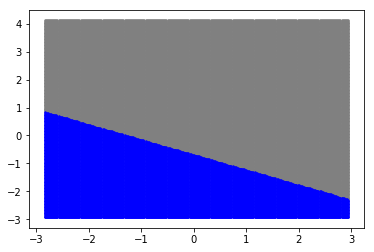

In [846]:
plotData(plot_points, 2, ["grey", "blue"])

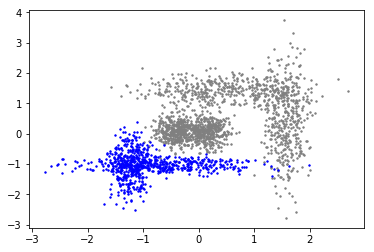

In [847]:
plotData(nTrainClass0Data, 2, ["grey", "blue"])

In [848]:
nTrainClass1Data = remapData(nTrainData, 1)
nValidationClass1Data = remapData(nValidationData, 1)



In [849]:
nTrainClass1_x = nTrainClass1Data[:, :2]
train_output = nTrainClass1Data[:, 2]

In [850]:
x = tf.placeholder(tf.float32, [None, 2])

W1 = tf.Variable(tf.truncated_normal([2,1], stddev = 0.1))
b1 = tf.Variable(tf.constant(0.1, shape = [1]))
y1 = tf.matmul(x, W1) + b1
y1_sig = tf.sigmoid(y1)
y_ = tf.placeholder(tf.float32, [None, ])

loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels = y_, logits = y1_sig[:,0]))
train_step = tf.train.AdagradOptimizer(2.0).minimize(loss)

sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
loss_arr = []
for _ in range(10000):
    sess.run(train_step, feed_dict={x: nTrainClass1_x, y_: train_output})
    W1_val, b1_val, y1_sig_val, loss_val = sess.run([W1, b1, y1_sig, loss],
     feed_dict = {x: nTrainClass1_x, y_: train_output})
    loss_arr.append(loss_val)



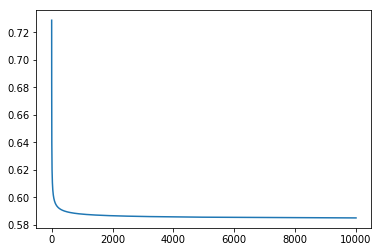

In [851]:
plt.plot(loss_arr)
plt.show()



In [852]:
y_pred = np.ndarray.flatten(y1_sig_val >=0.5)

In [853]:
y_act = train_output == 1

In [854]:
result = (~y_pred & ~y_act) | (y_pred & y_act)

In [855]:
nValidation_x = nValidationClass1Data[:, :2]

In [856]:
[validation_y1_sig] = sess.run([y1_sig], feed_dict={x: nValidation_x})

In [857]:
all_results.shape


(1800, 1)

In [858]:
all_results = np.append(all_results, validation_y1_sig, axis=1)

In [859]:
validation_output = nValidationClass1Data[:, 2]
y_pred = np.ndarray.flatten(validation_y1_sig >=0.5)
y_act = validation_output == 1
result = (~y_pred & ~y_act) | (y_pred & y_act)
print("Accuracy = %s"%(sum(result)*100/len(validation_output))) 

Accuracy = 94.7222222222


In [860]:
[all_y1_sig] = sess.run([y1_sig], feed_dict={x: n_all_points})
y_sig_class1 = all_y1_sig
y_pred_class1 = np.ndarray.flatten(all_y1_sig >=0.5)
n_result = y_pred_class1*1
a = n_result.reshape(75400, 1)
plot_points = np.append(n_all_points, a, axis=1)

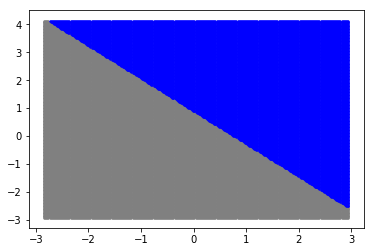

In [861]:
plotData(plot_points, 2, ["grey", "blue"])

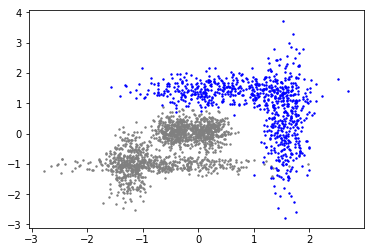

In [862]:
plotData(nTrainClass1Data, 2, ["grey", "blue"])

In [863]:
nTrainClass2Data = remapData(nTrainData, 2)
nValidationClass2Data = remapData(nValidationData, 2)

In [864]:
nTrainClass2_x = nTrainClass2Data[:, :2]
train_output = nTrainClass2Data[:, 2]

In [865]:
x = tf.placeholder(tf.float32, [None, 2])

W1 = tf.Variable(tf.truncated_normal([2,1], stddev = 0.1))
b1 = tf.Variable(tf.constant(0.1, shape = [1]))
y1 = tf.matmul(x, W1) + b1
y1_sig = tf.sigmoid(y1)
y_ = tf.placeholder(tf.float32, [None, ])

loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels = y_, logits = y1_sig[:,0]))
train_step = tf.train.AdagradOptimizer(2.0).minimize(loss)

sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
loss_arr = []
for _ in range(10000):
    sess.run(train_step, feed_dict={x: nTrainClass2_x, y_: train_output})
    W1_val, b1_val, y1_sig_val, loss_val = sess.run([W1, b1, y1_sig, loss],
     feed_dict = {x: nTrainClass2_x, y_: train_output})
    loss_arr.append(loss_val)




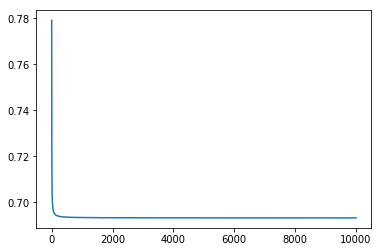

In [866]:
plt.plot(loss_arr)
plt.show()

In [867]:
y_pred = np.ndarray.flatten(y1_sig_val >=0.5)
y_act = train_output == 1
result = (~y_pred & ~y_act) | (y_pred & y_act)
nValidation_x = nValidationClass2Data[:, :2]
[validation_y1_sig] = sess.run([y1_sig], feed_dict={x: nValidation_x})


In [868]:
all_results = np.append(all_results, validation_y1_sig, axis=1)

In [869]:
validation_output = nValidationClass1Data[:, 2]
y_pred = np.ndarray.flatten(validation_y1_sig >=0.5)
y_act = validation_output == 1
result = (~y_pred & ~y_act) | (y_pred & y_act)
print("Accuracy = %s"%(sum(result)*100/len(validation_output))) 

Accuracy = 66.8333333333


In [870]:
[all_y1_sig] = sess.run([y1_sig], feed_dict={x: n_all_points})
y_sig_class2 = all_y1_sig
y_pred_class2 = np.ndarray.flatten(all_y1_sig >=0.5)
n_result = y_pred_class2*1
a = n_result.reshape(75400, 1)
plot_points = np.append(n_all_points, a, axis=1)

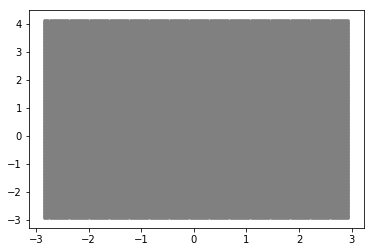

In [871]:
plotData(plot_points, 2, ["grey", "blue"])

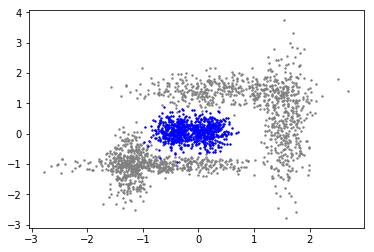

In [872]:
plotData(nTrainClass2Data, 2, ["grey", "blue"])

In [873]:
# Now find the correct class by selecting the maximum probablity

In [874]:
all_results

array([[  3.46990395e-03,   2.91316453e-02,   6.56545672e-05],
       [  9.99903440e-01,   2.12545382e-17,   1.36442948e-04],
       [  9.91762519e-01,   3.02499345e-11,   9.58557575e-05],
       ..., 
       [  2.13486692e-06,   4.18244355e-07,   1.27074658e-04],
       [  5.30860387e-02,   3.60637825e-10,   1.14688904e-04],
       [  3.48943286e-14,   9.02759254e-01,   1.29598819e-04]], dtype=float32)

In [875]:
pred_classes = np.argmax(all_results, axis=1)

In [876]:
all_results[-1]

array([  3.48943286e-14,   9.02759254e-01,   1.29598819e-04], dtype=float32)

In [877]:
validation_output = nValidationData[:, 2]

In [878]:
validation_output

array([ 1.,  0.,  0., ...,  2.,  2.,  1.])

In [879]:
pred_classes

array([1, 0, 0, ..., 2, 0, 1])

In [880]:
validation_output_int = validation_output.astype(int)

In [881]:
sum(pred_classes == validation_output_int)

1414

In [882]:
print("Overall Accuracy for validation data = %s"%(sum(pred_classes == validation_output_int)/len(validation_output)))

Overall Accuracy for validation data = 0.785555555556


In [885]:
y_sig_class0

array([[ 1.],
       [ 1.],
       [ 1.],
       ..., 
       [ 0.],
       [ 0.],
       [ 0.]], dtype=float32)

In [887]:
y_sig_class1

array([[ 0.],
       [ 0.],
       [ 0.],
       ..., 
       [ 1.],
       [ 1.],
       [ 1.]], dtype=float32)

In [886]:
y_sig_class0[0] - y_sig_class1[0]

array([ 1.], dtype=float32)

In [888]:
y_sig_class2

array([[ 0.00012301],
       [ 0.00012358],
       [ 0.00012414],
       ..., 
       [ 0.00012196],
       [ 0.00012252],
       [ 0.00012308]], dtype=float32)

In [898]:
y_sig_class01 = np.append(y_sig_class0, y_sig_class1, axis=1)

In [899]:
y_sig_class012 = np.append(y_sig_class01, y_sig_class2, axis=1)

In [900]:
y_sig_class012

array([[  1.00000000e+00,   0.00000000e+00,   1.23014164e-04],
       [  1.00000000e+00,   0.00000000e+00,   1.23577091e-04],
       [  1.00000000e+00,   0.00000000e+00,   1.24142593e-04],
       ..., 
       [  0.00000000e+00,   1.00000000e+00,   1.21962039e-04],
       [  0.00000000e+00,   1.00000000e+00,   1.22520156e-04],
       [  0.00000000e+00,   1.00000000e+00,   1.23080812e-04]], dtype=float32)

In [901]:
np.argmax(y_sig_class012, axis=1)

array([0, 0, 0, ..., 1, 1, 1])

In [902]:
all_pred_classes = np.argmax(y_sig_class012, axis=1)

In [906]:
sum(all_pred_classes == 1)

40488

In [907]:
np.append(n_all_points, all_pred_classes, axis=1)

ValueError: all the input arrays must have same number of dimensions

In [908]:
all_pred_classes.shape


(75400,)

In [909]:
a = all_pred_classes.reshape(75400, 1)

In [910]:
plot_points = np.append(n_all_points, a, axis=1)

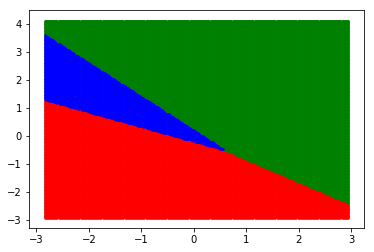

In [911]:
plotData(plot_points, 3, ["red", "green", "blue"])